## Space Server Dataset

About the Analysis:

From SDSS web page,

"The Sloan Digital Sky Survey has created the most detailed three-dimensional maps of the Universe ever made, with deep multi-color images of one third of the sky, and spectra for more than three million astronomical objects."

The data released by the SDSS is under public domain. Its taken from the current data release RD14.


The data consists of 10,000 observations of space taken by the SDSS. Every observation is described by 17 feature columns and 1 class column which identifies it to be either a star, galaxy or quasar.

Lets describe galaxy,star & Quasar: 

* Galaxy: A galaxy is a huge collection of gas, dust, and billions of stars and their solar systems, all held together by gravity.
* Star: A star is an astronomical object consisting of a luminous spheroid of plasma held together by its own gravity. The nearest star to Earth is the Sun. 
* Quasar: A quasar (/ˈkweɪzɑːr/; also known as a quasi-stellar object, abbreviated QSO) is an extremely luminous active galactic nucleus (AGN), in which a supermassive black hole with mass ranging from millions to billions of times the mass of the Sun is surrounded by a gaseous accretion disk

#### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import warnings
warnings.filterwarnings ('ignore')

In [2]:
sdf= pd.read_csv('space_server_dataset.csv')

In [3]:
sdf.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [4]:
sdf.tail()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
9995,1.237650e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,5.033450e+17,GALAXY,0.027583,447,51877,246
9996,1.237650e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,5.033400e+17,GALAXY,0.117772,447,51877,228
9997,1.237650e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.222620e+18,STAR,-0.000402,7303,57013,622
9998,1.237650e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.033400e+17,GALAXY,0.014019,447,51877,229
9999,1.237650e+18,131.665012,51.805307,19.27586,17.37829,16.30542,15.83548,15.50588,1345,301,3,163,5.033410e+17,GALAXY,0.118417,447,51877,233


In [5]:
sdf.shape

(10000, 18)

In [6]:
sdf.columns

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

Brief Details of each observation:

* ra (right ascension) and dec (declination) are the coordinates on the sky that correspond to longitude and latitude on Earth. RA measures east and west on the celestial sphere and is like longitude on the Earth. 
* Dec measures north and south on the celestial sphere and is like latitude on the Earth.

objid = Object Identifier
* ra = J2000 Right Ascension (r-band)-
* dec = J2000 Declination (r-band)

Knowing that the color of a star is related to the wavelength of light it gives off, lets you understand the meaning of the SDSS's color filters. Each filter is designed to let in light around a specific wavelength. The filters work by blocking out light at all wavelengths except those around the wavelength they are designed to see.

* u (ultraviolet)= better of DeV/Exp magnitude fit
* g (green) = better of DeV/Exp magnitude fit
* r (red) = better of DeV/Exp magnitude fit
* i (Near infrared) = better of DeV/Exp magnitude fit
* z (Infrared) = better of DeV/Exp magnitude fit

* run = Run Number - which identifies the specific scan
* rereun = Rerun Number
* camcol = Camera column - a number from 1 to 6, identifying the scanline within the run,
* field = Field number -The field number typically starts at 11 (after an initial rampup time), and can be as large as 800 for particularly long runs.
* specobjid = Object Identifier - 

A unique bit-encoded 64-bit ID used for optical spectroscopic objects. (APOGEE targets are assigned an "apogee_id" ID). It is generated from plateid, mjd, and fiberid. It is completely independent of any photometric enumeration system. It needs to be cast as unsigned 64-bit.

The bits are assigned in SpecObjID as follows:

50-63: plate id number (14 bits)
38-49: fiber id number (12 bits)
24-37: MJD (date) of plugging minus 50000 (14 bits)
10-23: "run2d" rerun number of pipeline reduction (14 bits)
0-9: all 0 (10 bits)


* class = object class (galaxy, star or quasar object)
* redshift = Final Redshift
(In physics, a redshift is an increase in the wavelength, and corresponding decrease in the frequency and photon energy, of electromagnetic radiation (such as light). The opposite change, a decrease in wavelength and simultaneous increase in frequency and energy, is known as a negative redshift, or blueshift. The terms derive from the colours red and blue which form the extremes of the visible light spectrum.)

(The value of a redshift is often denoted by the letter z, corresponding to the fractional change in wavelength (positive for redshifts, negative for blueshifts), and by the wavelength ratio 1 + z (which is >1 for redshifts, <1 for blueshifts).

* plate = plate number
Each spectroscopic exposure employs a large, thin, circular metal plate that positions optical fibers via holes drilled at the locations of the images in the telescope focal plane. These fibers then feed into the spectrographs. Each plate has a unique serial number, which is called plate in views such as SpecObj in the CAS. In APOGEE data in DR10 and later, note that while "plate" is commonly used interchangeably with Design, multiple plates may exist for the same design (i.e. for the same set of stars). For example, two plates may have identical targets but be drilled for observations at different hour angles, temperatures, or epochs, thereby making them unique plates with different Plate IDs.

* mjd = MJD of observation
Modified Julian Date, used to indicate the date that a given piece of SDSS data (image or spectrum) was taken.

* fiberid = fiber ID

*** above details cited from https://www.kaggle.com/farazrahman/predicting-star-galaxy-quasar-with-svm/

In [7]:
sdf

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.237650e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,5.033450e+17,GALAXY,0.027583,447,51877,246
9996,1.237650e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,5.033400e+17,GALAXY,0.117772,447,51877,228
9997,1.237650e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.222620e+18,STAR,-0.000402,7303,57013,622
9998,1.237650e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.033400e+17,GALAXY,0.014019,447,51877,229


In [8]:
sdf['class'].value_counts()

GALAXY    4998
STAR      4152
QSO        850
Name: class, dtype: int64

In [9]:
sdf.nunique(axis=0)

objid            1
ra           10000
dec          10000
u             9730
g             9817
r             9852
i             9890
z             9896
run             23
rerun            1
camcol           6
field          703
specobjid     6349
class            3
redshift      9637
plate          487
mjd            355
fiberid        892
dtype: int64

In [10]:
sdf['objid'].value_counts()

1.237650e+18    10000
Name: objid, dtype: int64

In [11]:
sdf['rerun'].value_counts()

301    10000
Name: rerun, dtype: int64

In [12]:
sdf.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

In [13]:
sdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


#### * Removing column 'objid' & 'rerun' as both have unique values in it.

In [14]:
sdf_1=sdf.drop(['objid','rerun'],axis=1)

In [15]:
sdf_1.describe()

,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,3.648700,302.380100,1.645022e+18,0.143726,1460.986400,52943.533300,353.069400
std,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,1.666183,162.577763,2.013998e+18,0.388774,1788.778371,1511.150651,206.298149
min,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,1.000000,11.000000,2.995780e+17,-0.004136,266.000000,51578.000000,1.000000
25%,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,2.000000,184.000000,3.389248e+17,0.000081,301.000000,51900.000000,186.750000
50%,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,4.000000,299.000000,4.966580e+17,0.042591,441.000000,51997.000000,351.000000
75%,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,5.000000,414.000000,2.881300e+18,0.092579,2559.000000,54468.000000,510.000000
max,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,6.000000,768.000000,9.468830e+18,5.353854,8410.000000,57481.000000,1000.000000


#### Observations:

* Mean for ra is 175.53% with std = 47.49
* Mean for dec is 14.84% & std = 25.21%. There is a huge difference between 75th percentile & max value indicating skewness.
* Mean for u is 18.62% & std = 0.83% 
* mean of g = 17.37, std = 0.95% 
* Mean for r = 16.84 & std = 1.06%
* Mean for i = 16.58 & std = 1.14%
* Mean for z  = 16.42% & std = 1.20
* Mean for run = 981.03 & std = 273.31%
* Mean for field = 302.38% & std = 162.58%
* mean for specobjid = 1.655 & std = 2.01
* MEan for redshift = 0.14 & std = 0.33
* mean for plate= 1461% & std = 1789%
* mean for mjd = 52943.53% & std = 1511.15%
* mean for fiberid = 353.06% & std = 206.30% there is a large difference between 75th percentile & max value indicating presence of outliers.

## Visualization
### Univariate Analysis

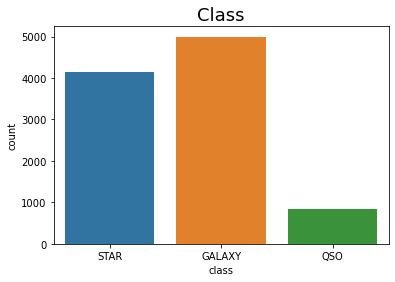

In [16]:
sns.countplot(sdf_1['class'],)
plt.title('Class', fontsize = 18)
plt.show()

* Count of Galaxies are more than Star & QSO

In [17]:
le=LabelEncoder()
sdf_1['class']=le.fit_transform(sdf_1['class'])

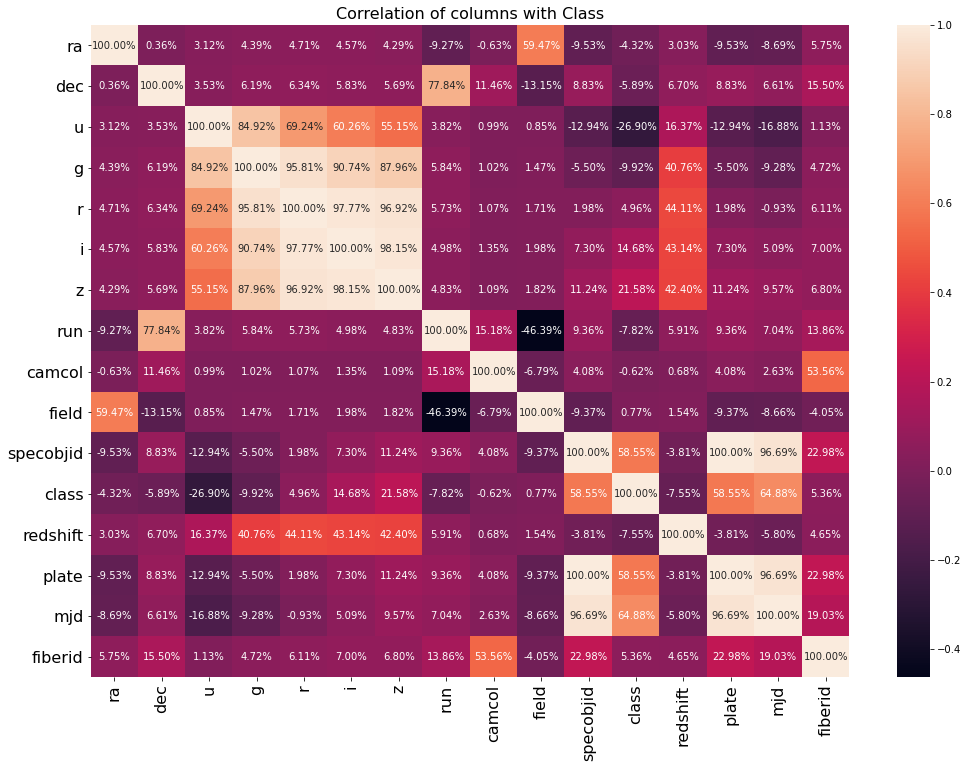

In [18]:
corr=sdf_1.corr()
plt.figure(figsize=(17,12),)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Correlation of columns with Class',fontsize = 16)
sns.heatmap(corr,annot=True,fmt='.2%',)
plt.show()

## Observation:

#### Correlation Matrix:

* Class has -ve corrs with camcol at -0.62% , ra at -4.32%, dec = -5.89%, redshift = -7.55%, run = -7.82%,g=-9.92%
* Highes -ve corr of class is with u = -26.90%
* Class is highly positively correlated with mjd = 64.88%
* Class is positively correlated with plate & specobjid @ 58.55% & they both are correlated with eachother at 100%.
* With z,i & r there is a +ve corr of 21.58%,14.68% & 4.96%

ra               AxesSubplot(0.125,0.71587;0.168478x0.16413)
dec           AxesSubplot(0.327174,0.71587;0.168478x0.16413)
u             AxesSubplot(0.529348,0.71587;0.168478x0.16413)
g             AxesSubplot(0.731522,0.71587;0.168478x0.16413)
r               AxesSubplot(0.125,0.518913;0.168478x0.16413)
i            AxesSubplot(0.327174,0.518913;0.168478x0.16413)
z            AxesSubplot(0.529348,0.518913;0.168478x0.16413)
run          AxesSubplot(0.731522,0.518913;0.168478x0.16413)
camcol          AxesSubplot(0.125,0.321957;0.168478x0.16413)
field        AxesSubplot(0.327174,0.321957;0.168478x0.16413)
specobjid    AxesSubplot(0.529348,0.321957;0.168478x0.16413)
class        AxesSubplot(0.731522,0.321957;0.168478x0.16413)
redshift           AxesSubplot(0.125,0.125;0.168478x0.16413)
plate           AxesSubplot(0.327174,0.125;0.168478x0.16413)
mjd             AxesSubplot(0.529348,0.125;0.168478x0.16413)
fiberid         AxesSubplot(0.731522,0.125;0.168478x0.16413)
dtype: object

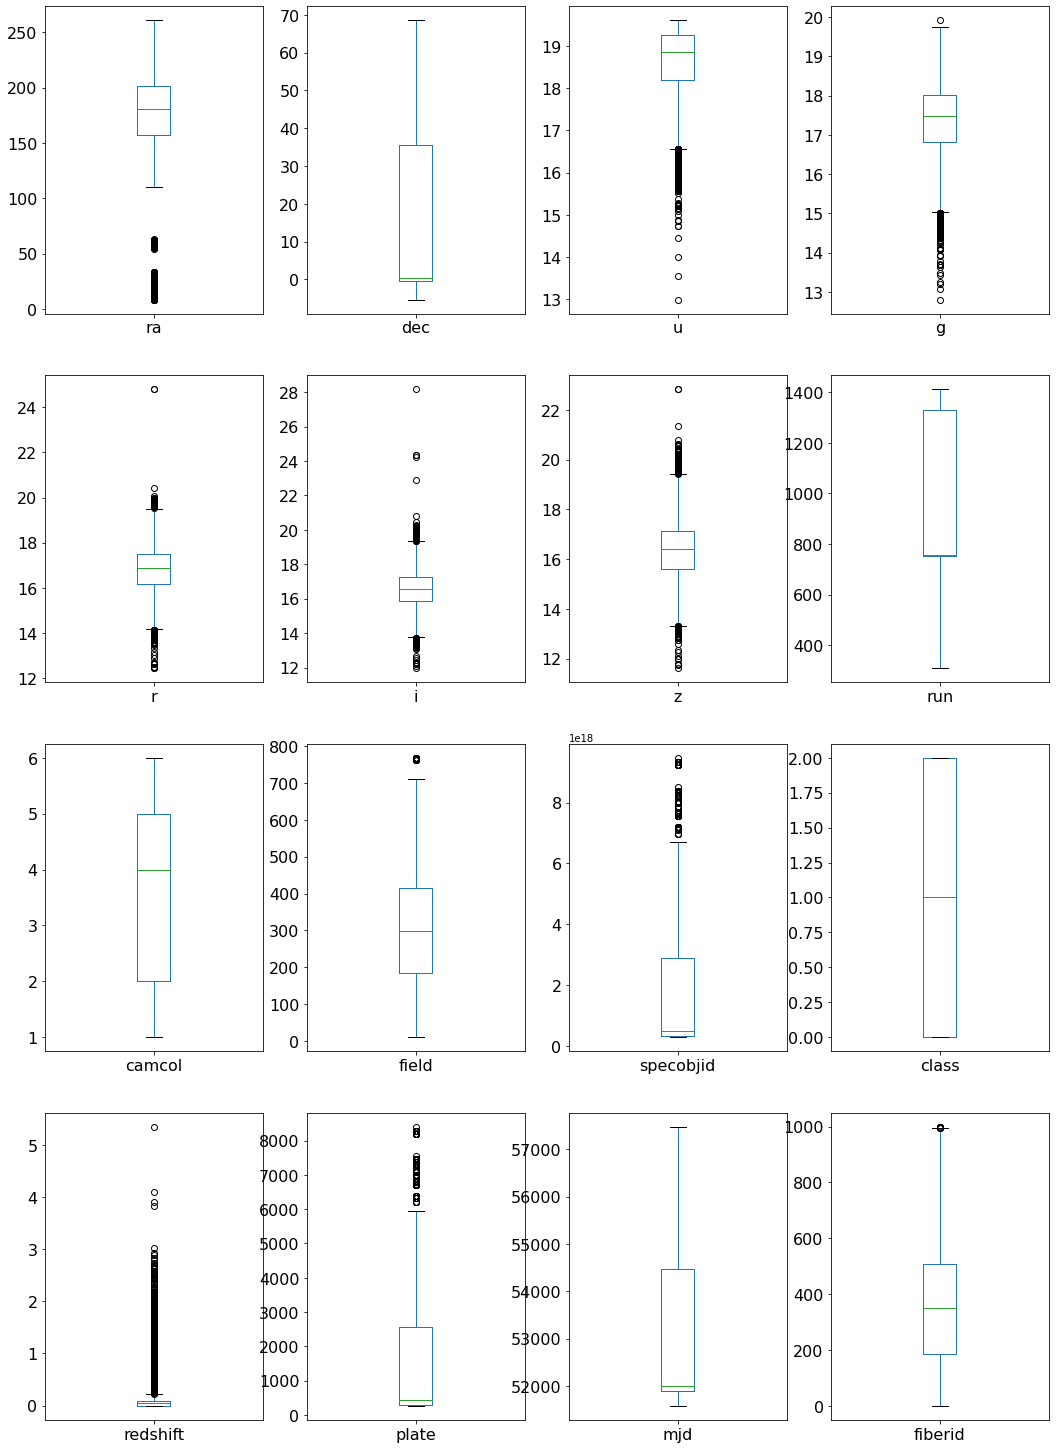

In [19]:
sdf_1.plot(kind = 'box', subplots = True, layout = (4,4),figsize = (18,26),fontsize=16)


## Observation:

* The above boxplot confirms presence of outliers in columns = ra,u,g,r,i,z,spaceobjid,redshift ,plate & fiberid.
* plate & specobjid's boxplot is same with same amount of outliers.


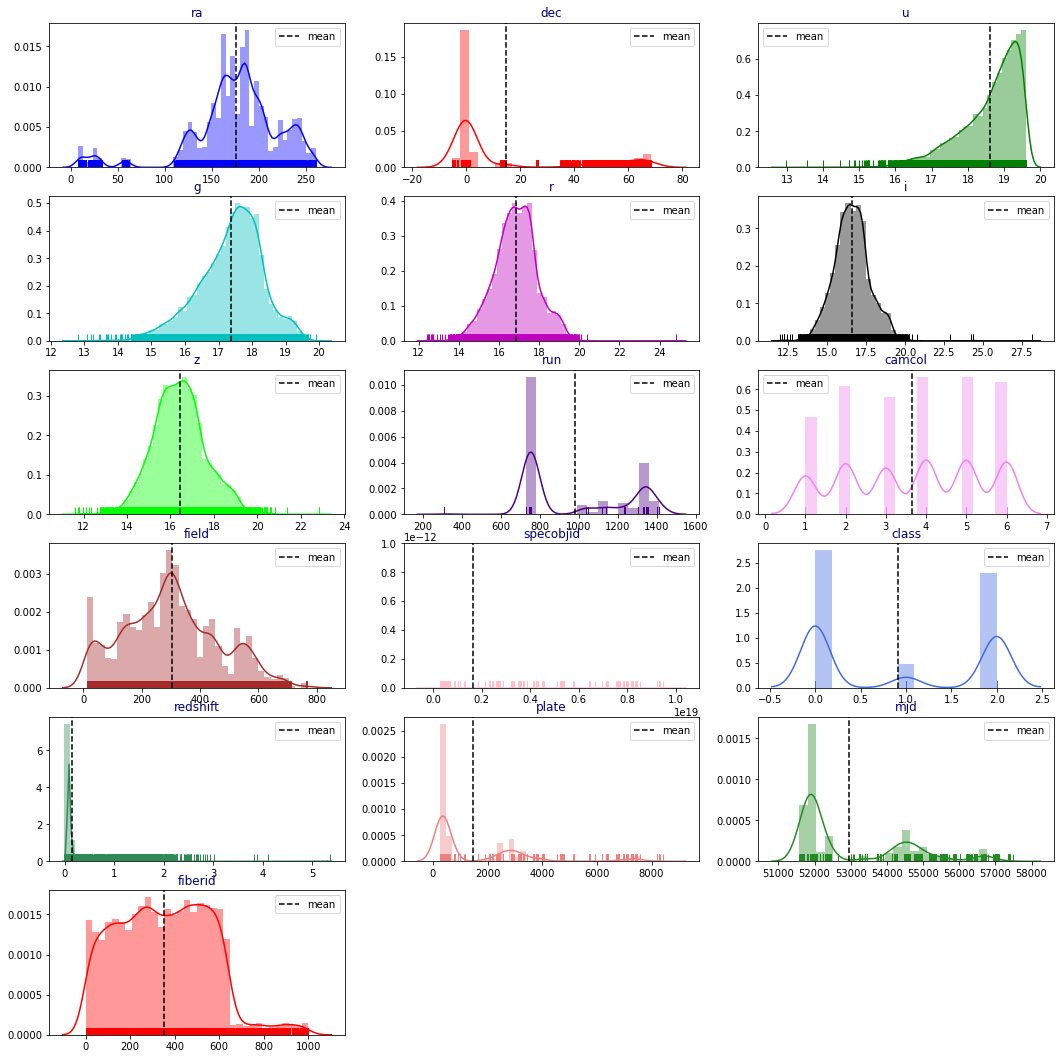

In [20]:
import itertools
columns = sdf_1.columns  
cols  = (columns) 
length = len(cols)
fig = plt.figure(figsize = (18,25))
cs=['b','r','g','c','m','k','lime','indigo','violet','brown','pink','royalblue','seagreen','lightcoral','forestgreen','r']

for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(8,3,j+1)
    ax = sns.distplot(sdf_1[i],color = k,rug = True,kde=True)
    ax.set_facecolor('w')
    plt.axvline(sdf_1[i].mean(),linestyle = 'dashed',label='mean',color='k')
    plt.legend(loc='best')
    plt.title(i,color='navy')
    plt.xlabel("")


In [21]:
sdf_1.skew()

ra          -1.227350
dec          1.191544
u           -1.219795
g           -0.536293
r           -0.021673
i            0.286442
z            0.214313
run          0.412555
camcol      -0.100220
field        0.249795
specobjid    1.794627
class        0.169292
redshift     4.265729
plate        1.794609
mjd          1.039610
fiberid      0.308053
dtype: float64

### Observations - distplot/skewness

* redshift has the highest skewness of 4.27% & the same is also visible in the distplot.
* plate & specobjid have same skewness of 1.794%


## Data Cleaning

* From the observations above we can see plate & specobjid have 100% correlation, same boxplot & same skewness. The correlation of both of them are also same with the target variable so we will drop one of the columns from the data for further analysis.
* redshift & ra have too many outliers, high skewness of 4.265 & -1.227, & are least negatively correlated with target variable ra at -4.32%, redshift = -7.55%, Deleting these columns too as for treating these the % loss of the data is around 18% to 30% 


In [22]:
sdf_2 = sdf_1.drop(['redshift','ra','plate'],axis=1)

# Outliers

#### ZScore Method

In [23]:
from scipy.stats import zscore
z=np.abs(zscore(sdf_2))
threshold = 3
print(np.where(z>3))
sdf_zscr=sdf_2[(z<3).all(axis=1)]
sdf_zscr.shape

(array([ 199,  203,  217,  218,  219,  220,  221,  222,  223,  224,  225,
        226,  227,  228,  229,  273,  287,  312,  313,  313,  375,  464,
        524,  554,  554,  667,  688,  688,  771,  797,  818,  818,  818,
        818,  818,  856,  904,  928,  941,  949,  949, 1377, 1379, 1383,
       1440, 1440, 1483, 1496, 1531, 1632, 1632, 1632, 1632, 1632, 1647,
       1647, 1723, 1723, 1723, 1737, 1737, 1737, 1737, 1737, 1807, 1807,
       1807, 1821, 1857, 1857, 1857, 1858, 1858, 1858, 1878, 1879, 1882,
       1884, 1886, 1887, 1889, 1894, 1897, 1899, 1903, 1905, 1906, 1907,
       1909, 1915, 1975, 1977, 1977, 1978, 1980, 1981, 1982, 1983, 1984,
       1986, 1987, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1998,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012,
       2013, 2014, 2014, 2016, 2018, 2019, 2130, 2130, 2178, 2178, 2178,
       2178, 2178, 2209, 2230, 2260, 2260, 2260, 2295, 2295, 2313, 2350,
       2467, 2537, 2584, 2587, 2587, 2628, 2629, 2

(9439, 13)

#### IQR Method

In [24]:
Q1 = sdf_2.quantile(0.25)
Q3 = sdf_2.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
sdf_iqr=sdf_2[~((sdf_2 < (Q1 - 1.5 * IQR)) | (sdf_2 > (Q3 + 1.5 * IQR))).any(axis=1)]
sdf_iqr.shape

dec          3.618843e+01
u            1.081197e+00
g            1.195045e+00
r            1.339343e+00
i            1.404845e+00
z            1.523162e+00
run          5.790000e+02
camcol       3.000000e+00
field        2.300000e+02
specobjid    2.542375e+18
class        2.000000e+00
mjd          2.568000e+03
fiberid      3.232500e+02
dtype: float64


(9121, 13)

### Percentage loss of data post removal of outliers

In [25]:
sdf_2.shape

(10000, 13)

In [26]:
zscore_loss=(10000-9439)/10000 *100
print(zscore_loss)
iqr_loss=(10000-9121)/10000*100
print(iqr_loss)

5.609999999999999
8.790000000000001


* As the % loss of data is lowest with using zscore method hence will remove the outliers using tis method.

In [27]:
sdf_3= sdf_zscr
sdf_3.shape

(9439, 13)

## Skewness

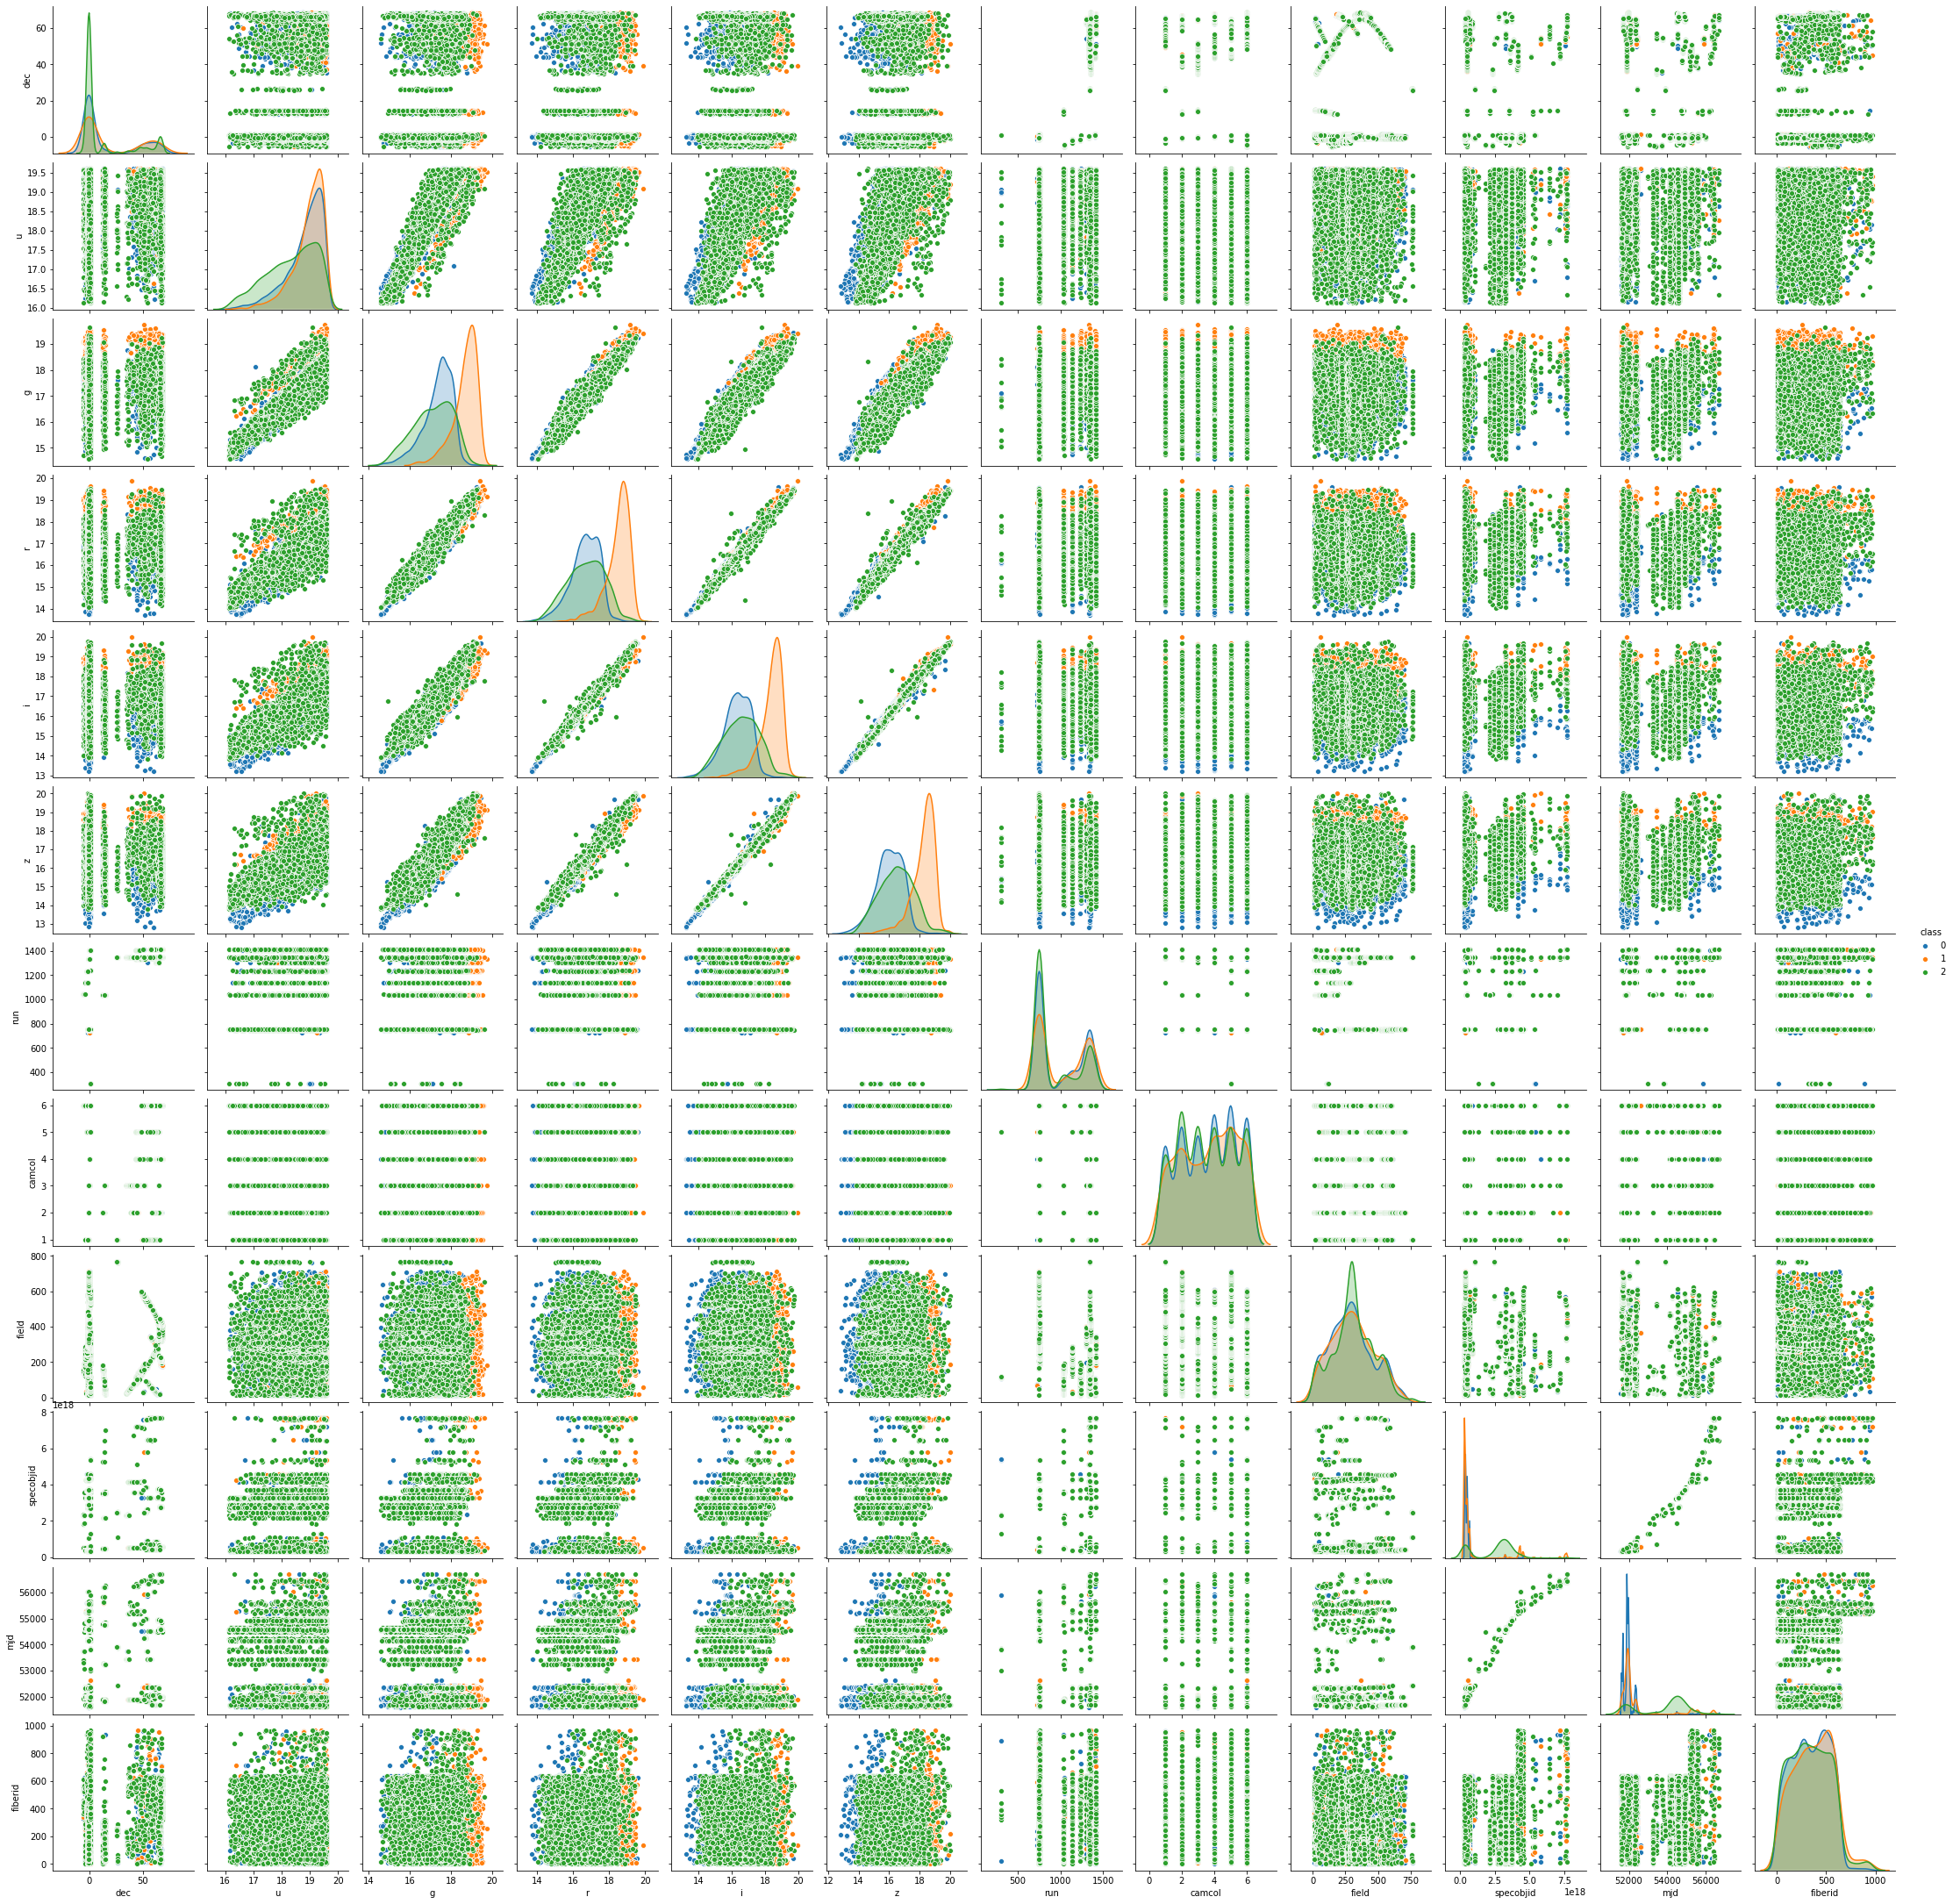

In [28]:
sns.pairplot(data = sdf_3,hue = 'class')

* There is a positve linear relation seen between u,r,i,g & z.
* There is large number of  class relation seen from the observations.

### Skewness

In [29]:
sdf_3.skew()

dec          1.225977
u           -1.002848
g           -0.403415
r           -0.019654
i            0.135825
z            0.219975
run          0.489892
camcol      -0.079881
field        0.241618
specobjid    1.376165
class        0.263565
mjd          0.985566
fiberid      0.135804
dtype: float64

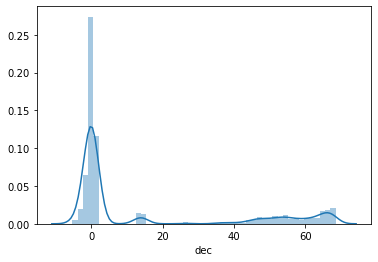

In [30]:
sns.distplot(sdf_3['dec'])

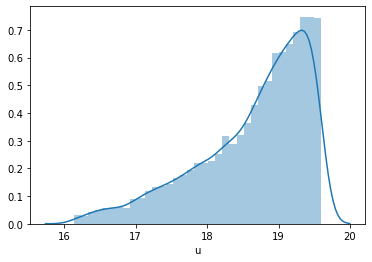

In [31]:
sns.distplot(sdf_3['u'])

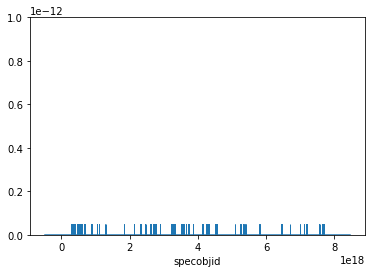

In [32]:
sns.distplot(sdf_3['specobjid'],rug=True,kde=True)

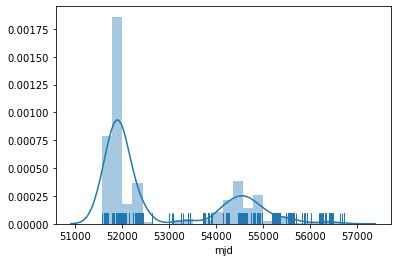

In [33]:
sns.distplot(sdf_3['mjd'],rug=True,kde=True)

* Will use power transformer to treat the skewness in the data, before that needs to split the ddata

In [34]:
x=sdf_3.drop(['class'],axis=1)
x.shape

(9439, 12)

In [35]:
y=sdf_3['class']
y

0       2
1       2
2       0
3       2
4       2
       ..
9993    0
9995    0
9996    0
9998    0
9999    0
Name: class, Length: 9439, dtype: int32

In [36]:
from sklearn.preprocessing import power_transform
x=power_transform (x,method = 'yeo-johnson')

## Scaling the Data

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
sc=StandardScaler()
x=sc.fit_transform(x)

# Modeling

In [48]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score

In [49]:
gnb = GaussianNB()
svc = SVC()
dtc = DecisionTreeClassifier()
knc = KNeighborsClassifier()
rfc = RandomForestClassifier()

In [41]:
max_scr=0
for i in range(0,35):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.30,stratify = y)
    gnb.fit(x_train,y_train)
    pred_train=gnb.predict(x_train)
    pred_test=gnb.predict(x_test)
    print('At random_state = ', i, )
    print('Training accuracy score = ', accuracy_score(y_train,pred_train))
    print('Testing accuracy score = ', accuracy_score(y_test,pred_test))

At random_state =  0
Training accuracy score =  0.799757832601786
Testing accuracy score =  0.8029661016949152
At random_state =  1
Training accuracy score =  0.8012713788406236
Testing accuracy score =  0.7962570621468926
At random_state =  2
Training accuracy score =  0.8005146057212048
Testing accuracy score =  0.803319209039548
At random_state =  3
Training accuracy score =  0.7988497048584834
Testing accuracy score =  0.8029661016949152
At random_state =  4
Training accuracy score =  0.795973967004692
Testing accuracy score =  0.815677966101695
At random_state =  5
Training accuracy score =  0.8020281519600424
Testing accuracy score =  0.7983757062146892
At random_state =  6
Training accuracy score =  0.7986983502345997
Testing accuracy score =  0.7955508474576272
At random_state =  7
Training accuracy score =  0.8033903435749962
Testing accuracy score =  0.7997881355932204
At random_state =  8
Training accuracy score =  0.7977902224912972
Testing accuracy score =  0.8036723163841

* The model performs well at random_state = 22
* Scores:
* Training accuracy score =  0.80354169819888
* Testing accuracy score =  0.8050847457627118

In [42]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 22,test_size = .30,stratify=y)

In [43]:
model = [gnb,svc,knc,dtc,rfc]


for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm = m.predict(x_test)
    print('Accuracy score of ', m, 'is: ' )
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test, predm))
    print(classification_report(y_test,predm))
    print('\n')
    cross_val = cross_val_score(m,x,y,cv = 5)
    print('Cross Validation of ',m, 'is: ' )
    print('Mean CV of ',m, 'is: ',cross_val.mean(),'and','Std CV of ', m, 'is: ',cross_val.std())
    print('\n')
    print('\n')

Accuracy score of  GaussianNB() is: 
0.8050847457627118
[[1359   31   91]
 [  27  209    5]
 [ 245  153  712]]
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1481
           1       0.53      0.87      0.66       241
           2       0.88      0.64      0.74      1110

    accuracy                           0.81      2832
   macro avg       0.75      0.81      0.76      2832
weighted avg       0.83      0.81      0.80      2832



Cross Validation of  GaussianNB() is: 
Mean CV of  GaussianNB() is:  0.7998745318099755 and Std CV of  GaussianNB() is:  0.011245380211774477




Accuracy score of  SVC() is: 
0.9110169491525424
[[1421   10   50]
 [  19  206   16]
 [ 139   18  953]]
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      1481
           1       0.88      0.85      0.87       241
           2       0.94      0.86      0.90      1110

    accuracy                          

* The score of 2 models are good.. Optimising the score using GridsearchCV

Accuracy score of  SVC() is: 0.9110169491525424 | Mean CV = 0.9146112338659697 

Accuracy score of  rfc() is: 0.9318502824858758 | Mean CV = 0.9280661955574718  


# Hypertuning & GridSearchCV

In [44]:
parameters = {'C':[0.01,0.1,1.0,10],'kernel':['linear', 'poly','rbf','sigmoid'],'gamma':['scale','auto']}
clf=GridSearchCV(svc,parameters,cv = 5)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'C': 10, 'gamma': 'scale', 'kernel': 'linear'}


In [54]:
svc=SVC(gamma = 'scale',
        kernel = 'linear',C = 10 )
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
pred_svc=svc.predict(x_test)
print('Accuracy Score of SVC with ', accuracy_score(y_test,pred_svc))
print('Confusion Matrix of svc with ',confusion_matrix(y_test,pred_svc))
print('Classification Repor ',classification_report(y_test,pred_svc))
cross_val = cross_val_score(svc,x,y,cv =5 )
print('Cross Validation of SVC = ', cross_val)
print('Mean CV of SVC is: ',cross_val.mean(),'and','Std CV of SvC is: ', cross_val.std())

Accuracy Score of SVC with  0.9586864406779662
Confusion Matrix of svc with  [[1428   10   43]
 [  14  211   16]
 [  22   12 1076]]
Classification Repor                precision    recall  f1-score   support

           0       0.98      0.96      0.97      1481
           1       0.91      0.88      0.89       241
           2       0.95      0.97      0.96      1110

    accuracy                           0.96      2832
   macro avg       0.94      0.94      0.94      2832
weighted avg       0.96      0.96      0.96      2832

Cross Validation of SVC =  [0.95762712 0.95974576 0.95709746 0.95074153 0.96131426]
Mean CV of SVC is:  0.9573052239677363 and Std CV of SvC is:  0.0036126855455136265


* The Accuracy score & cross val score of SVC improvised by hyper tunimng the model. Hence saving this model for 

Accuracy Score of SVC with  0.9586864406779662 | Mean CV of SVC is:  0.9573052239677363 

# Serialization

In [51]:
import joblib

In [52]:
joblib.dump(svc,'spaceserverdataset.pkl')

['spaceserverdataset.pkl']

# Conclusion

In [55]:
a=np.array(y_test)
p = np.array(svc.predict(x_test))
print(a)
print('\n')
print(p)
space_server_df=pd.DataFrame({'Original': a, 'Predicted': p }, index = range (len(a)))
space_server_df

[2 0 0 ... 0 2 0]


[2 0 0 ... 0 2 0]


,Original,Predicted
0,2,2
1,0,0
2,0,0
3,0,0
4,2,2
...,...,...
2827,2,2
2828,0,0
2829,0,0
2830,2,2
